<a href="https://colab.research.google.com/github/cairoegito/Series-temporais-em-negocios-reais/blob/main/S%C3%A9ries_temporais_em_vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**OBJETIVO DE NEGÓCIO**

Vamos pegar esse dataset com dados empresariais sobre as vendas de veículos e analisarmos se há um padrão, como ele se comporta, o que podemos deduzir dele e o que podemos gerar. Analisar o passado da empresa para aperfeiçoarmos o futuro da mesma

## 1- Importando bibliotecas e o dataset

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import plotly.express as px 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.ar_model import AR


In [ ]:
#Importando dataset
df = pd.read_csv("/content/drive/MyDrive/series temporais/empresa_x.csv", sep=",")

In [ ]:
#Visualizando primeiras linhas e colunas
df.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


## 2- Análise exploratória de dados

In [ ]:
#Observando o tipo dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [ ]:
#Observando as estatísticas da variável numérica 
df.describe()

,vendas
count,24.000000
mean,287.875000
std,222.151204
min,10.000000
25%,96.000000
50%,245.500000
75%,450.750000
max,721.000000


In [ ]:
#Observando tamanho do dataset
Nrow, Ncol = df.shape
print(f'o número de linhas é {Nrow} e o de colunas é {Ncol}')

o número de linhas é 24 e o de colunas é 2


In [ ]:
#Transformando nossa variável de object para datetime
pd.to_datetime(df['vendas'])

0    1970-01-01 00:00:00.000000010
1    1970-01-01 00:00:00.000000020
2    1970-01-01 00:00:00.000000033
3    1970-01-01 00:00:00.000000047
4    1970-01-01 00:00:00.000000063
5    1970-01-01 00:00:00.000000081
6    1970-01-01 00:00:00.000000101
7    1970-01-01 00:00:00.000000124
8    1970-01-01 00:00:00.000000148
9    1970-01-01 00:00:00.000000174
10   1970-01-01 00:00:00.000000201
11   1970-01-01 00:00:00.000000230
12   1970-01-01 00:00:00.000000261
13   1970-01-01 00:00:00.000000293
14   1970-01-01 00:00:00.000000326
15   1970-01-01 00:00:00.000000362
16   1970-01-01 00:00:00.000000400
17   1970-01-01 00:00:00.000000440
18   1970-01-01 00:00:00.000000483
19   1970-01-01 00:00:00.000000527
20   1970-01-01 00:00:00.000000573
21   1970-01-01 00:00:00.000000621
22   1970-01-01 00:00:00.000000670
23   1970-01-01 00:00:00.000000721
Name: vendas, dtype: datetime64[ns]

In [ ]:
df.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [ ]:
# Observando a média de vendas e quando isso ocorre
x = df[df['vendas'] < df['vendas'].mean()]
print(x)

           mes  vendas
0   2017-01-31      10
1   2017-02-28      20
2   2017-03-31      33
3   2017-04-30      47
4   2017-05-31      63
5   2017-06-30      81
6   2017-07-31     101
7   2017-08-31     124
8   2017-09-30     148
9   2017-10-31     174
10  2017-11-30     201
11  2017-12-31     230
12  2018-01-31     261


Mais da metade do tempo observado (24 meses) foi composto por vendas abaixo da média, entretanto é uma diferença mínima perante o período de vendas acima da média (1 mês) 

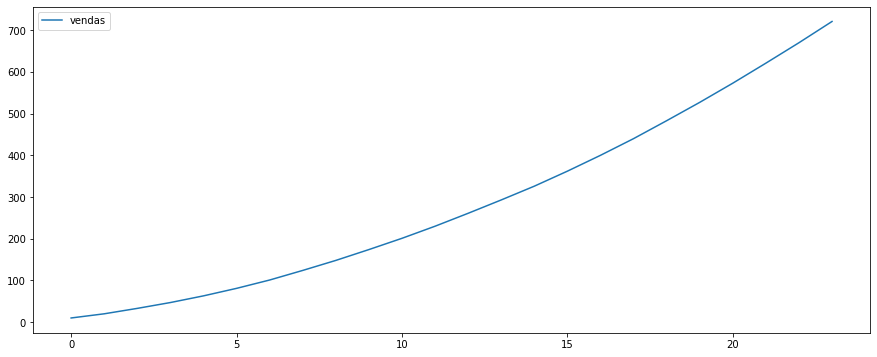

In [ ]:
#Plotando nosso gráfico
df.plot(figsize=(15,6))

Aqui notamos uma função exponencial com base maior do que zero, afinal nosso gráfico é crescente. Confirmando nossa observação inicial que as vendas abaixo da média se concentram no ano de 2017 e que foram aumentando progressivamente. Por causa do comportamento matemático da nossa variável não faz sentido aplicarmos os conceitos de média móvel 

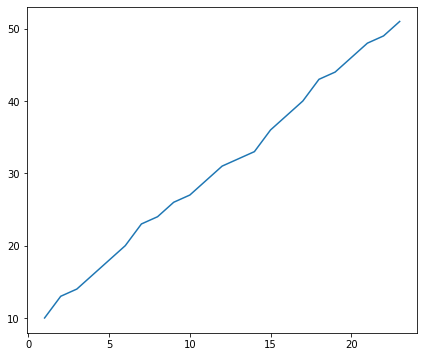

In [ ]:
#Vamos observar a sazonalidade
df.vendas.diff().plot(figsize=(7,6))

Para observar a sazonalidade (padrão temporal) faz sentido eliminarmos as tendências do gráfico, algo que nossa variável apresentou muito. Por isso, aplicamos o conceito de diferença para ter uma série estacionária. Como a série analisa um período curto de tempo isso não fica tão evidente graficamente

## 3- Machine Learning e previsibilidade

In [ ]:
df['naive'] = df.vendas.shift(1)
df.head()

,vendas,naive
mes,,
2017-01-31,10,NaN
2017-02-28,20,10.0
2017-03-31,33,20.0
2017-04-30,47,33.0
2017-05-31,63,47.0


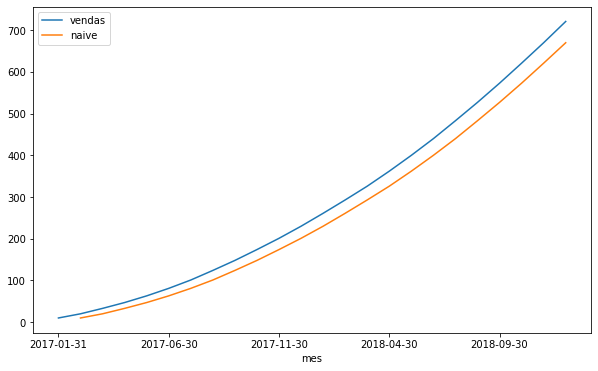

In [ ]:
df.plot(figsize=(10,6))

Utilizamos o modelo Naive, que é pouco eficaz nesse caso pela pouca variabilidade dos dados e também do modelo. O mesmo considera o valor antecessor como a previsão do sucessor. Mas é interessante para analisarmos o comportamento da variável 

In [ ]:
#Observando melhor pela métrica do erro quadrático
((df['vendas'] - df['naive']) **2).mean()


1105.0869565217392

**Modelo  regressão linear e auto-regressivo**

Utiliza a regressão linear para a previsibilidade e é mais confiável, para tal vamos desenvolver melhor a ideia do mesmo

In [ ]:
df['x1'] = df.vendas.shift(1)

In [ ]:
df.dropna(axis=0, inplace=True)

Eliminamos a linha 0 por ser a 1 de nosso padrão

In [ ]:
X= df.x1.values.reshape(-1,1)
y = df.vendas.values.reshape(-1,1)
X

array([[ 10.],
       [ 20.],
       [ 33.],
       [ 47.],
       [ 63.],
       [ 81.],
       [101.],
       [124.],
       [148.],
       [174.],
       [201.],
       [230.],
       [261.],
       [293.],
       [326.],
       [362.],
       [400.],
       [440.],
       [483.],
       [527.],
       [573.],
       [621.],
       [670.]])

In [ ]:
#Criando modelo
regr = LinearRegression().fit(X,y)

In [ ]:
previsoes = regr.predict(X)

In [ ]:
#Erro quadrado médio
((y - previsoes) **2).mean()

4.977630656568885

In [ ]:
df['x2'] = previsoes
df.head()

,vendas,naive,x1,x2
mes,,,,
2017-02-28,20,10.0,10.0,25.504818
2017-03-31,33,20.0,20.0,36.099631
2017-04-30,47,33.0,33.0,49.872887
2017-05-31,63,47.0,47.0,64.705624
2017-06-30,81,63.0,63.0,81.657323


O erro é muito menor que o Naive, o que nos mostra um modelo muito mais eficiente. Entretanto, isso é maximizado justamente por nosso dataset ter um período limitado de valores. Mesmo assim temos um modelo eficiente e de certa confiança

Resumidamente também notamos que a política adotada pela empresa em 2018, seja qual for, deu resultado. Nosso modelo considerou o dataset inteiro e portanto caso a receita de 2018 seja copiada as vendas podem ser ainda maiores que a projeção!

Para melhorar o modelo e evitar um overfiting, usaremos um modelo considerando a previsão, que possui um certo erro quadrático. Com isso, aumentaremos a imprevisibilidade dos nossos dados e um modelo mais adepto da realidade

In [ ]:
df.index = pd.PeriodIndex(df.index, freq="M")


In [ ]:
A_R = AR(df.vendas).fit(2)

In [ ]:
resid = A_R.resid

In [ ]:
resid.head()

mes
2017-04   -0.908083
2017-05    0.098423
2017-06    0.136007
2017-07    0.169496
2017-08    1.198890
Freq: M, dtype: float64

In [ ]:
resid.describe()

count    2.100000e+01
mean     1.364580e-12
std      6.768394e-01
min     -9.080831e-01
25%     -7.418331e-01
50%      1.468824e-01
75%      2.403348e-01
max      1.208188e+00
dtype: float64

In [ ]:
(resid ** 2).mean()

0.4362967486556987

Temos um aqui um erro quadrático menor ainda, o que indica uma melhoria na previsão de nossa variável. Nosso desvio padrão não está baixo diante da nossa distribuição, mas a mediana está próxima da média, nos dando a ideia até de uma série que pode ser estacionária